In [68]:
import torch 

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.pyplot as plt
from sympy import *


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [31]:
def X(a, n):
    x = np.zeros(n, dtype=np.float)
    l = len(a[0])
    return [reduce(lambda a,b:a+b, a[i])/l for i in range(n)]
    

def Sn(a, n):
    sn = np.zeros((n, n), dtype=np.float)
    x = a.mean(1)
    l = len(a[0])
    for i in range(n):
        for j in range(n):
            sn[i][j] = reduce(lambda a,b:a+b, map(lambda a: a[0]*a[1], zip(map(lambda a:a-x[i], a[i]), map(lambda a:a-x[j], a[j]))))/l
    return sn

def R(a, n):
    sn = np.zeros((n, n), dtype=np.float)
    x = a.mean(1)
    l = len(a[0])
    for i in range(n):
        for j in range(n):
            sn[i][j] = reduce(lambda a,b:a+b, map(lambda a: a[0]*a[1], zip(map(lambda a:a-x[i], a[i]), map(lambda a:a-x[j], a[j]))))/l
    
    r = np.zeros((n, n), dtype=np.float)
    for i in range(n):
        for j in range(n):
            r[i][j] = sn[i][j]/(np.sqrt(sn[i][i])*np.sqrt(sn[j][j]))
    return r

In [32]:
# exercise 1.1 
a1 = [3, 4, 2, 6, 8, 2, 5]
a2 = [5, 5.5, 4, 7, 10, 5, 7.5]

a = np.stack((a1, a2))

print("numpy:")
x1 = a.mean(1)[0]
x2 = a.mean(1)[1]
print(f"x1 mean: {x1:.2f} \nx2 mean: {x2:.2f}")
#print(f"s11 std: {a.std(1)[0]:.2f} \ns12 std: {a.std(1)[1]:.2f}")
print(f"s11 var: {a.var(1)[0]:.2f} \ns22 var: {a.var(1)[1]:.2f}")
s12 = reduce(lambda a,b:a+b, map(lambda a: a[0]*a[1], zip(map(lambda a:a-x1, a1), map(lambda a:a-x2, a2))))/(len(a1))
print(f"s12 = {s12:0.2f}")
# print(f"cov : {np.cov(a)}") numpy cov divison the n-1 ,not the n

b = torch.Tensor([a1, a2])
print("\n\ntorch:")
print(f"x1 mean: {b.mean(1)[0]:.2f} \nx2 mean: {b.mean(1)[1]:.2f}")
#print(f"s11 std: {b.std(1)[0]:.2f} \ns12 std: {b.std(1)[1]:.2f}")
#print(f"s11 var: {b.var(1)[0]:.2f} \ns22 var: {b.var(1)[1]:.2f}")
#print(f"cov : {np.cov(b)}")


numpy:
x1 mean: 4.29 
x2 mean: 6.29
s11 var: 4.20 
s22 var: 3.56
s12 = 3.70


torch:
x1 mean: 4.29 
x2 mean: 6.29


x1 mean: 5.20 
x2 mean: 12.48
s11 std: 3.09 
s22 std: 5.27
s12 = -15.94
r12 = -0.98
Large x1 occurs with small x2 and vice versa
x_ : [[5.2], [12.480999999999998]]
Sn = [[3.0919249667480613, -15.9392], [-15.9392, 5.269623231313601]]
R = [[1, -0.9782683632637273], [-0.9782683632637273, 1]]


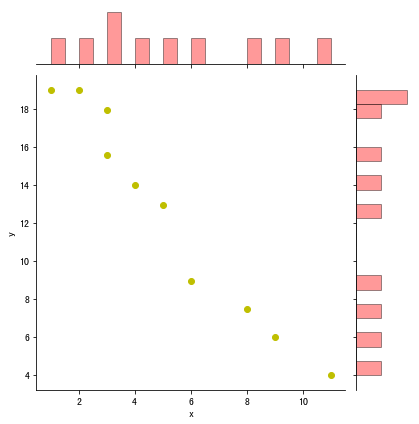

In [33]:
# exercise 1.2 
a1 = [1, 2, 3, 3, 4, 5, 6, 8, 9, 11]
a2 = [18.95, 19.00, 17.95, 15.54, 14.00, 12.95, 8.94, 7.49, 6.00, 3.99]

a = np.stack([a1, a2], 1)
df = pd.DataFrame(a)
df.columns = ['x', 'y']
#np.random.seed(sum(map(ord, 'distributions')))
#sns.relplot(x="x", y="y", data=df)
sns.jointplot(x="x", y="y", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             );
#plt.scatter(a1, a2)

x1 = a.mean(0)[0]
x2 = a.mean(0)[1]
print(f"x1 mean: {x1:.2f} \nx2 mean: {x2:.2f}")
s11_sqrt = a.std(0)[0]
s22_sqrt = a.std(0)[1]
print(f"s11 std: {s11_sqrt:.2f} \ns22 std: {s22_sqrt:.2f}")
#print(f"s11 var: {a.var(0)[0]:.2f} \ns22 var: {a.var(0)[1]:.2f}")
s12 = reduce(lambda a,b:a+b, map(lambda a: a[0]*a[1], zip(map(lambda a:a-x1, a1), map(lambda a:a-x2, a2))))/(len(a1))
print(f"s12 = {s12:0.2f}")
r12 = s12/(s11_sqrt*s22_sqrt)
print(f"r12 = {r12:0.2f}")
print("Large x1 occurs with small x2 and vice versa")
x_= [[x1], [x2]]
print(f"x_ : {x_:}")
print(f"Sn = {[[s11_sqrt, s12], [s12, s22_sqrt]]}")
print(f"R = {[[1, r12], [r12, 1]]}")


In [34]:
# exercise 1.3 
  
a1 = [9, 2, 6, 5, 8]
a2 = [12, 8, 6, 4, 10]
a3 = [3, 4, 0, 2, 1]

a = np.stack([a1, a2, a3])
print(X(a,3))
print(Sn(a, 3))
print(R(a, 3))

[6.0, 8.0, 2.0]
[[ 6.   4.  -1.4]
 [ 4.   8.   1.2]
 [-1.4  1.2  2. ]]
[[ 1.          0.57735027 -0.40414519]
 [ 0.57735027  1.          0.3       ]
 [-0.40414519  0.3         1.        ]]




        x1和x2之间存在正相关关系，因为样本
        量很小，很难确定边际的性质
        分布然而，x1的边际分布似乎偏向右边，
        x2接缝的边缘分布合理地具有系统性
      
[155.603, 14.703]
[[6728.807921  273.246681]
 [ 273.246681   23.578441]]
[[1.         0.68600659]
 [0.68600659 1.        ]]


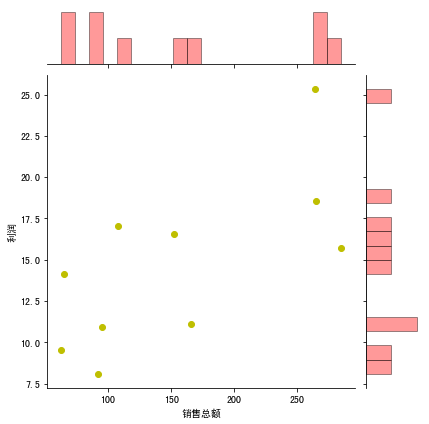

In [35]:
# exercise 1.4
a1 = ['花旗银行', '通用电气', '美国国际公司', '美洲银行', '汇丰集团', '埃克森美孚', '皇家荷兰壳牌', '英国石油', '荷兰国际', '丰田摩托']
a2 = [108.28, 152.36, 95.04, 65.45, 62.97, 263.99, 265.19, 285.06, 92.01, 165.68]
a3 = [17.05, 16.59, 10.91, 14.14, 9.52, 25.33, 18.54, 15.73, 8.10, 11.12]
a4 = [1484.10, 750.33, 766.42, 1110.46, 1031.29, 195.26, 193.83, 191.11, 1175.16, 211.15]

a = np.stack([a1, a2, a3, a4])
df = pd.DataFrame({'公司':a1, '销售总额':a2, '利润':a3, '资产':a4})
sns.jointplot(x="销售总额", y="利润", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             );
print("""

        x1和x2之间存在正相关关系，因为样本
        量很小，很难确定边际的性质
        分布然而，x1的边际分布似乎偏向右边，
        x2接缝的边缘分布合理地具有系统性
      """)
a = np.stack([a2, a3])
print(X(a, 2))
print(Sn(a, 2))
print(R(a, 2))


         x1和x2之间存在负相关，x2和x3之间存在负相关。
         x1的边际分布似乎偏向右边，边缘分布
         对于x2接缝合理的对称，x3的边际分布似乎也是偏斜的
         在右边
      
[155.603, 14.703, 710.9109999999998]
[[ 6.72880792e+03  2.73246681e+02 -3.20183636e+04]
 [ 2.73246681e+02  2.35784410e+01 -9.47944893e+02]
 [-3.20183636e+04 -9.47944893e+02  2.13348843e+05]]
[[ 1.          0.68600659 -0.84505489]
 [ 0.68600659  1.         -0.42264954]
 [-0.84505489 -0.42264954  1.        ]]


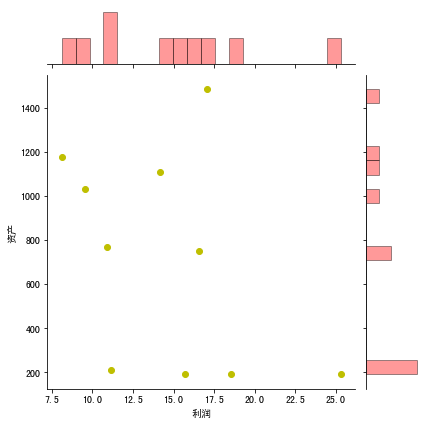

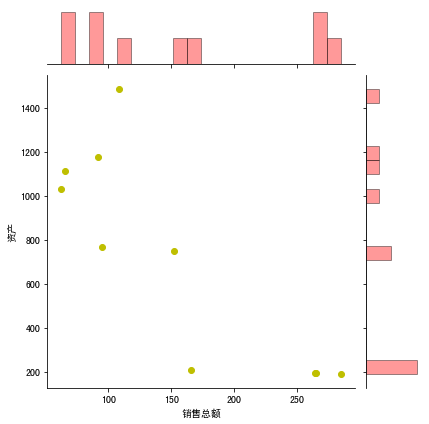

In [36]:
# exercise 1.5
a1 = ['花旗银行', '通用电气', '美国国际公司', '美洲银行', '汇丰集团', '埃克森美孚', '皇家荷兰壳牌', '英国石油', '荷兰国际', '丰田摩托']
a2 = [108.28, 152.36, 95.04, 65.45, 62.97, 263.99, 265.19, 285.06, 92.01, 165.68]
a3 = [17.05, 16.59, 10.91, 14.14, 9.52, 25.33, 18.54, 15.73, 8.10, 11.12]
a4 = [1484.10, 750.33, 766.42, 1110.46, 1031.29, 195.26, 193.83, 191.11, 1175.16, 211.15]

df = pd.DataFrame({'公司':a1, '销售总额':a2, '利润':a3, '资产':a4})
sns.jointplot(x="利润", y="资产", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             );
print("""
         x1和x2之间存在负相关，x2和x3之间存在负相关。
         x1的边际分布似乎偏向右边，边缘分布
         对于x2接缝合理的对称，x3的边际分布似乎也是偏斜的
         在右边
      """)
sns.jointplot(x="销售总额", y="资产", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             );
a = np.stack([a2, a3, a4])
print(X(a, 3))
print(Sn(a, 3))
print(R(a, 3))

[7.5, 73.85714285714286, 4.5476190476190474, 2.1904761904761907, 10.047619047619047, 9.19047619047619, 3.0952380952380953]
[[ 2.44047619e+00 -2.71428571e+00 -3.69047619e-01 -4.52380952e-01
  -5.71428571e-01 -2.57142857e+00  1.66666667e-01]
 [-2.71428571e+00  2.93360544e+02  3.81632653e+00 -1.35374150e+00
   6.60204082e+00  3.30272109e+01  6.08843537e-01]
 [-3.69047619e-01  3.81632653e+00  1.48582766e+00  6.57596372e-01
   2.25963719e+00  2.87188209e+00  1.38321995e-01]
 [-4.52380952e-01 -1.35374150e+00  6.57596372e-01  1.15419501e+00
   1.06235828e+00 -8.21995465e-01  1.72335601e-01]
 [-5.71428571e-01  6.60204082e+00  2.25963719e+00  1.06235828e+00
   1.10929705e+01  3.20521542e+00  1.01927438e+00]
 [-2.57142857e+00  3.30272109e+01  2.87188209e+00 -8.21995465e-01
   3.20521542e+00  3.25827664e+01  6.72335601e-01]
 [ 1.66666667e-01  6.08843537e-01  1.38321995e-01  1.72335601e-01
   1.01927438e+00  6.72335601e-01  4.67120181e-01]]
[[ 1.         -0.10144191 -0.19380318 -0.26954261 -0.1098

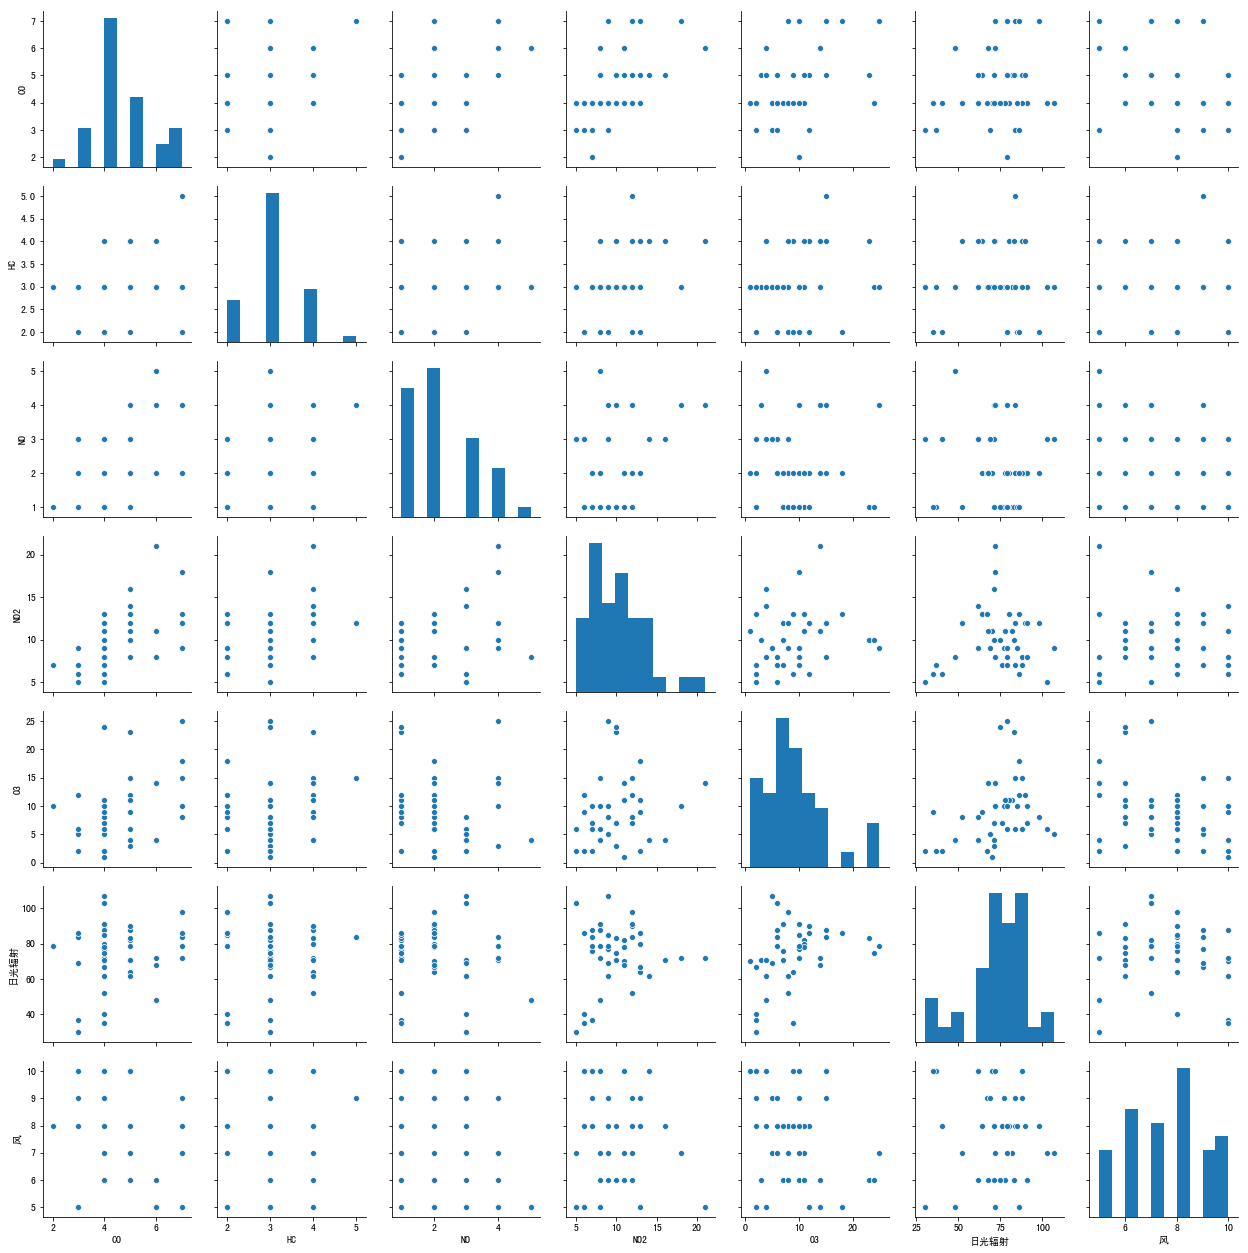

In [44]:
# exercise 1.6
a1 = [8, 7, 7, 10, 6, 8, 9, 5, 7, 8, 6, 6, 7, 10, 10, 9, 8, 8, 9, 9, 10, 9, 8, 5, 6, 8, 6,8, 6, 10, 8, 7, 5, 6, 10, 8, 5, 5, 7, 7, 6, 8]
a2 = [98, 107, 103, 88, 91, 90, 84, 72, 82, 64, 71, 91, 72, 70, 72, 77, 76, 71, 67, 69, 62, 88, 80, 30, 83, 84, 78, 79, 62, 37, 71, 52, 48, 75, 35, 85,86, 86, 79, 79, 68,40]
a3 = [7, 4, 4, 5, 4, 5, 7, 6, 5, 5, 5, 4, 7, 4, 4, 4, 4, 5, 4, 3, 5, 4, 4, 3, 5, 3, 4, 2, 4, 3, 4, 4, 6, 4, 4, 4, 3, 7, 7, 5, 6, 4]
a4 = [2, 3, 3, 2, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2, 1, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 2, 4, 2, 2, 3]
a5 = [12, 9, 5, 8, 8, 12,  12,21,11,13,10, 12,18,11,8,9, 7,16,13,9,14, 7,13,5,10,7, 11,7,9,7,10, 12,8,10,6,9, 6,13,9,8,11,6]
a6 = [8, 5, 6, 15, 10,12, 15,14,11,9,3, 7, 10, 1, 10, 10, 7,4,2,5,4, 6,11,2,23,6, 11,10,8,2,7, 8,4,24,9,10, 12,18,25,6,14,2]
a7 = [2,3,3,4,3,4, 5,4,3,4,3, 3,3,3,3,3, 3,4,3,3,4, 3,4,3,4,3, 3,3,3,3,3, 4,3,3,2,2, 2,2,3,2,3,2]

a = np.stack([a1, a2, a3, a4, a5, a6, a7])
df = pd.DataFrame({'风':a1, '日光辐射':a2, 'CO':a3, 'NO':a4, 'NO2':a5, 'O3':a6, 'HC':a7})
sns.pairplot(df)
print(X(a, 7))
print(Sn(a, 7))
print(R(a, 7))
print("""对x3，x4表现出小到中等的正相关，对x3，x5因此也是如此
     大多数条目相关性都很小""")

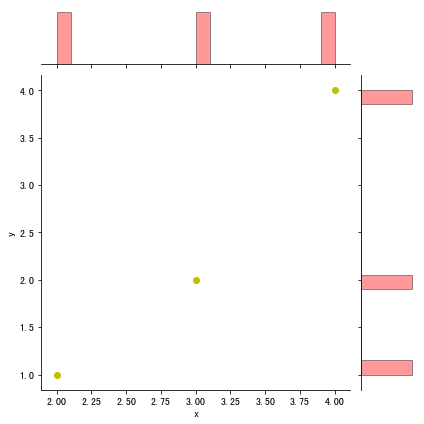

In [46]:
# exercise 1.7
a1 = [2, 3, 4]
a2 = [1, 2, 4]

df = pd.DataFrame({'x':a1, 'y':a2})
sns.jointplot(x="x", y="y", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             );              

using (1-12) d(P, P) = 2.236
using (1-20) d(P, P) = 1.018


/Users/oneai/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "eclipse". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


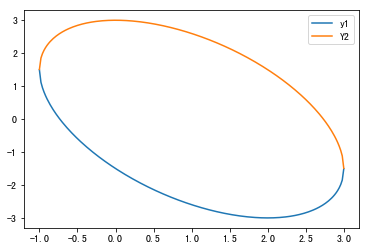

<Figure size 720x576 with 0 Axes>

In [86]:
# exercise 1.8
a11, a22, a12 = 1/3, 4/27, 1/9
P = (-1, 1)
Q = (1, 0)
d_P_Q_1 = np.sqrt((P[0]-Q[0])*(P[0]-Q[0]) + (P[1]-Q[1])*(P[1]-Q[1]))
print(f"using (1-12) d(P, P) = {d_P_Q_1:.3f}")

d_P_Q_2 = np.sqrt(a11*(P[0]-Q[0])*(P[0]-Q[0]) + 2*a12*(P[0]-Q[0])*(P[1]-Q[1]) + a22*(P[1]-Q[1])*(P[1]-Q[1]))
print(f"using (1-20) d(P, P) = {d_P_Q_2:.3f}")

y=Symbol('y')
xlist = []
ylist1 = []
ylist2 = []
for x in np.linspace(-1+0.00001, 3-0.00001, 200):
    s = solve(a11*(x-1)*(x-1) + 2*a12*(x-1)*(y) + a22*y*y -1, y)
    xlist.append(x)
    ylist1.append(s[0])
    ylist2.append(s[1])
    
    
fig, ax = plt.subplots()
plt.figure(figsize=(10, 8))
line1, = ax.plot(xlist, ylist1,label='y1')
line2, = ax.plot(xlist, ylist2,label='Y2')
ax.legend(loc='eclipse')
plt.show()

a)
[1.375, 0.75]
[[20.484375  9.09375 ]
 [ 9.09375   6.1875  ]]
[[1.         0.80774457]
 [0.80774457 1.        ]]
b)
[-6.2700000000000005, -4.011, -1.36, 0.461, 2.674, 4.933, 7.584, 8.506]
[0.8300000000000001, -1.383, 1.775, -1.337, 0.922, -1.291, 1.867, -0.8069999999999999]
c)
[1.564625, 0.07200000000000001]
[[ 2.49040735e+01 -2.45696250e-02]
 [-2.45696250e-02  1.76900175e+00]]
[[ 1.         -0.00370168]
 [-0.00370168  1.        ]]
d)
using (1-12) d(P, P) = 5.234
e)
using (1-20) d(P, P) = 2.249


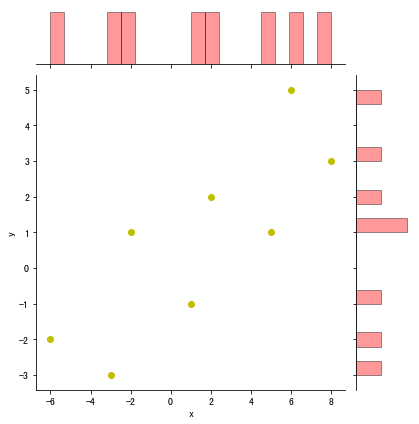

In [94]:
# exercise 1.9

a1 = [-6, -3, -2, 1, 2, 5, 6, 8]
a2 = [-2, -3, 1, -1, 2, 1, 5, 3]

df = pd.DataFrame({'x':a1, 'y':a2})
sns.jointplot(x="x", y="y", data=df, color="y",               
              kind = 'scatter',
              marginal_kws=dict(bins=20,color='r',
                                hist_kws={'edgecolor':'k'}),   # 边缘图设置
              annot_kws=dict(stat='r',fontsize=15)
             ); 
a = np.stack([a1, a2])
print("a)")
print(X(a, 2))
print(Sn(a, 2))
print(R(a, 2))

a1_ = []
a2_ = []

for i,j in zip(a1, a2):
    a1_.append(i*0.899 + j*0.438)
    a2_.append(-i*0.438 + j*0.899)

a_ = np.stack([a1_, a2_])
print("b)")
print(a1_)
print(a2_)

print("c)")
print(X(a_, 2))
print(Sn(a_, 2))
print(R(a_, 2))


print("d)")
P = [4*0.899 + 2*0.438, -4*0.899 + 2*0.438]
Q = [0, 0]

d_P_Q_1 = np.sqrt((P[0]-Q[0])*(P[0]-Q[0]) + (P[1]-Q[1])*(P[1]-Q[1]))
print(f"using (1-12) d(P, Q) = {d_P_Q_1:.3f}")

print("e)")

d_P_Q_2 = np.sqrt(a11*(P[0]-Q[0])*(P[0]-Q[0]) + 2*a12*(P[0]-Q[0])*(P[1]-Q[1]) + a22*(P[1]-Q[1])*(P[1]-Q[1]))
print(f"using (1-20) d(P, Q) = {d_P_Q_2:.3f}")

In [ ]:
# exercise 1.10


4


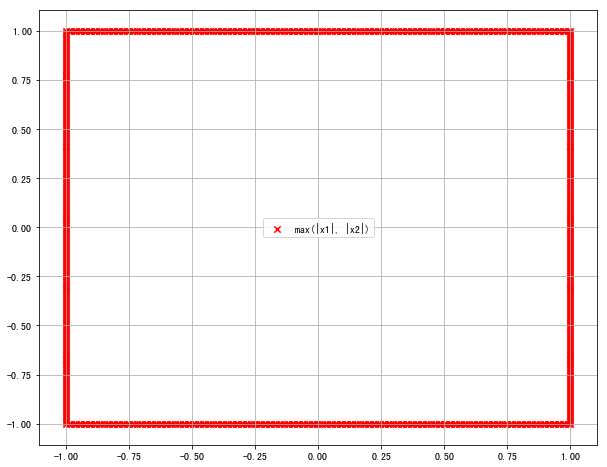

In [106]:
# exercise 1.11
print(max(np.abs(-3),np.abs(4)))


xlist = []
ylist = []
for x in np.linspace(-1, 1, 200):
    for y in np.linspace(-1, 1, 200):
        if max(np.abs(x),np.abs(y)) == 1:
            xlist.append(x)
            ylist.append(y)
            
plt.figure(figsize=(10, 8))
plt.scatter(xlist, ylist, marker = 'x',color = 'red', s = 40 ,label = 'max(|x1|, |x2|)')
plt.grid()
plt.legend()
plt.show()
        

In [108]:
# exercise 1.13
def d(P, Q):
    return np.abs(P[0]-Q[0]) + np.abs(P[1]-Q[1])

A, B, C = [1, 2], [5, 3], [3, 5]

len_min = 10
P = [1, 1]
for i in range(1, 6):
    for j in range(1, 6):
        t = [i, j]
        dist = d(t, A)+d(t, B)+d(t, C)
        if dist < len_min:
            len_min = dist
            P = t
P = [chr(ord('A')+P[0]-1), P[1]]
print(P) 

['C', 3]


In [ ]:
# exercise 1.14
a1 = []